In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
pattern=Sequential()
pattern.add(Conv2D(filters=50,kernel_size=(3,3),strides=(2,2),activation="relu",input_shape=(28,28,1)))
pattern.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
pattern.add(Dropout(0.2))
pattern.add(Conv2D(filters=50,kernel_size=(3,3),strides=(2,2),activation="relu"))
pattern.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
pattern.add(Dropout(0.2))
pattern.add(Flatten())
pattern.add(Dropout(0.2))
pattern.add(Dense(128,activation="relu"))
pattern.add(Dense(64,activation="relu"))
pattern.add(Dense(10,activation="softmax"))
pattern.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
pattern.fit(X_train,y_train,batch_size=32,epochs=10)

Using TensorFlow backend.
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\fra



Epoch 1/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.2400 - accuracy: 0.9233
Epoch 2/10
60000/60000 [==============================] - 51s 846us/step - loss: 0.0872 - accuracy: 0.9726
Epoch 3/10
60000/60000 [==============================] - 53s 878us/step - loss: 0.0690 - accuracy: 0.9780
Epoch 4/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.0560 - accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 55s 919us/step - loss: 0.0524 - accuracy: 0.9834
Epoch 6/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.0479 - accuracy: 0.9849
Epoch 7/10
60000/60000 [==============================] - 59s 978us/step - loss: 0.0419 - accuracy: 0.9861
Epoch 8/10
60000/60000 [==============================] - 57s 954us/step - loss: 0.0404 - accuracy: 0.9874
Epoch 9/10
60000/60000 [==============================] - 55s 921us/step - loss: 0.0365 - accuracy: 0.9880
Epoch 10/10
60000/60000 [==========

In [4]:
train_loss,train_accuracy=pattern.evaluate(X_train,y_train)
test_loss,test_accuracy=pattern.evaluate(X_test,y_test)
print("Train data accuracy :",train_accuracy*100)
print("Test data accuracy :",test_accuracy*100)

10000/10000 [==============================] - 3s 259us/step
Train data accuracy : 99.53666925430298
Test data accuracy : 98.87999892234802


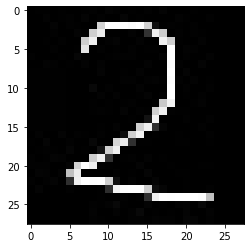

The hand-written digit is : 2 , 100.0 %


In [52]:
from skimage.transform import resize
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path="handwriting.jpg"
images=plt.imread(img_path)
images=resize(images,(28,28,1))
prediction=pattern.predict(np.array([images]))
index=np.argmax(prediction)
pixels = images.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.show()
index_string=str(index)
accu_string=str((np.max(prediction)*100).round(2))
print("The hand-written digit is :",index_string+" , "+accu_string+" %")